In [13]:
from agents import Agent, Runner

from pydantic import BaseModel


agent = Agent(
    name = "Assistant Agent",
    instructions = "You are a helpful assistant. Use tools when needed to answer questions",
)

result = await Runner.run(agent,"Hello how are you? ")

print(result.final_output)

Hello! I’m just a virtual assistant, so I don’t have feelings, but I’m here and ready to help you. How can I assist you today?


In [14]:
from agents import Agent, Runner, function_tool, ItemHelpers, SQLiteSession

from pydantic import BaseModel




class Answer(BaseModel):
    answer: str


@function_tool
def get_weather(city: str):
    """Get weather by city"""
    print(city)
    return "30 degrees"


agent = Agent(
    name="Assistant Agent",
    instructions="You are a helpful assistant. Use tools when needed to answer questions",
    tools=[get_weather],
)

stream = Runner.run_streamed(
    agent, "Hello how are you? What is the weather in the capital of Spain?"
)

async for event in stream.stream_events():

    # print(event)
    # print("=" * 20)
    print(event.type)
    if event.type=="raw_response_event":
        continue
    elif event.type =="agent_updated_stream_event":
        print("Agent updated to", event.new_agent.name)
    elif event.type == "run_item_stream_event":
        if event.item.type =="tool_call_item":
            print(event.item.raw_item.to_dict())
        elif event.item.type =="tool_call_output_item":
            print(event.item.output)
        elif event.item.type ==" message_output_item":
            print(ItemHelpers.text_message_output(event.item))
        # print(event.item.type)
    


    # if event.type == "raw_response_event":

    # if event.type == "raw_response_event":
    #     continue
    # elif event.type == "agent_updated_stream_event":
    #     print("Agent updated to", event.new_agent.name)
    # elif event.type == "run_item_stream_event":
    #     if event.item.type == "tool_call_item":
    #         print(event.item.raw_item.to_dict())
    #     elif event.item.type == "tool_call_output_item":
    #         print(event.item.output)
    #     elif event.item.type == "message_output_item":
    #         print(ItemHelpers.text_message_output(event.item))
    print("=" * 20)

agent_updated_stream_event
Agent updated to Assistant Agent
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
run_item_stream_event
{'arguments': '{"city":"Madrid"}', 'call_id': 'call_SeQU5Jn1u5cCu7inn87jJZZb', 'name': 'get_weather', 'type': 'function_call', 'id': 'fc_07fee3bb5523e3b6006906cb4f83c4819b8d3f32a2387cfb35', 'status': 'completed'}
raw_response_event
Madrid
run_item_stream_event
30 degrees
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event
raw_response_event


In [2]:
from agents import Agent, Runner, function_tool, ItemHelpers


@function_tool
def get_weather(city: str):
    """Get weather by city"""
    return "30 degrees"


agent = Agent(
    name="Assistant Agent",
    instructions="You are a helpful assistant. Use tools when needed to answer questions",
    tools=[get_weather],
)

stream = Runner.run_streamed(
    agent, "Hello how are you? What is the weather in the capital of Spain?"
)

message = ""
args = ""


async for event in stream.stream_events():

    if event.type == "raw_response_event":
        event_type = event.data.type
        if event_type == "response.output_text.delta":
            message += event.data.delta
            print(message)
        elif event_type == "response.function_call_arguments.delta":
            args += event.data.delta
            print(args)
        elif event_type == "response.completed":
            message = ""
            args = ""

{"
{"city
{"city":"
{"city":"Madrid
{"city":"Madrid"}
Hello
Hello!
Hello! I'm
Hello! I'm doing
Hello! I'm doing well
Hello! I'm doing well,
Hello! I'm doing well, thank
Hello! I'm doing well, thank you
Hello! I'm doing well, thank you for
Hello! I'm doing well, thank you for asking
Hello! I'm doing well, thank you for asking.
Hello! I'm doing well, thank you for asking. The
Hello! I'm doing well, thank you for asking. The weather
Hello! I'm doing well, thank you for asking. The weather in
Hello! I'm doing well, thank you for asking. The weather in Madrid
Hello! I'm doing well, thank you for asking. The weather in Madrid,
Hello! I'm doing well, thank you for asking. The weather in Madrid, the
Hello! I'm doing well, thank you for asking. The weather in Madrid, the capital
Hello! I'm doing well, thank you for asking. The weather in Madrid, the capital of
Hello! I'm doing well, thank you for asking. The weather in Madrid, the capital of Spain
Hello! I'm doing well, thank you for asking. Th

In [ ]:
from agents import Agent, Runner, function_tool, ItemHelpers

from pydantic import BaseModel




class Answer(BaseModel):
    answer: str


@function_tool
def get_weather(city: str):
    """Get weather by city"""
    print(city)
    return "30 degrees"


agent = Agent(
    name="Assistant Agent",
    instructions="You are a helpful assistant. Use tools when needed to answer questions",
    tools=[get_weather],
)

stream = Runrun_streamedner.(
    agent, "Hello how are you? What is the weather in the capital of Spain?"
)

message =""


async for event in stream.stream_events():

    # print(event)
    # print("=" * 20)
    # print(event.type)
    if event.type=="raw_response_event":
            # print(event.data.type)
            event_type = event.data.type
            if event_type == "response.output_text.delta":
                print(event.data.delta)
                # print(event_type)
                message += event.data.delta
                print(message)
            elif event_type =="response.function_call_arguments.delta":
                print(event.data.delta)
                args += event.data.delta
                print(args)

            elif event_type =="response.complete":
                message =""
                args =""

        # continue
    
    
    # print("=" * 20)

{"
{"
city
{"city
":"
{"city":"
Madrid
{"city":"Madrid
"}
{"city":"Madrid"}
Madrid
Hello
Hello
!
Hello!
 I'm
Hello! I'm
 doing
Hello! I'm doing
 well
Hello! I'm doing well
,
Hello! I'm doing well,
 thank
Hello! I'm doing well, thank
 you
Hello! I'm doing well, thank you
.
Hello! I'm doing well, thank you.
 The
Hello! I'm doing well, thank you. The
 current
Hello! I'm doing well, thank you. The current
 weather
Hello! I'm doing well, thank you. The current weather
 in
Hello! I'm doing well, thank you. The current weather in
 Madrid
Hello! I'm doing well, thank you. The current weather in Madrid
,
Hello! I'm doing well, thank you. The current weather in Madrid,
 the
Hello! I'm doing well, thank you. The current weather in Madrid, the
 capital
Hello! I'm doing well, thank you. The current weather in Madrid, the capital
 of
Hello! I'm doing well, thank you. The current weather in Madrid, the capital of
 Spain
Hello! I'm doing well, thank you. The current weather in Madrid, the capital of S

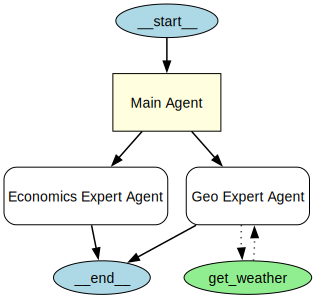

In [59]:
from agents import Agent, Runner, SQLiteSession, function_tool,trace
from agents.extensions.visualization import draw_graph
from pydantic import BaseModel

session = SQLiteSession("user_1","ai-memory.db")

class Answer(BaseModel):
    answer: str
    background_explanation: str 

@function_tool
def get_weather():
    return "30"


geaography_agent = Agent(
    name="Geo Expert Agent",
    instructions="You are a expert in geography, you answer questions related to them.",
    handoff_description="Use this to answer geography related questions.",
    tools = [get_weather],
    output_type= Answer,
)
economics_agent = Agent(
    name="Economics Expert Agent",
    instructions="You are a expert in economics, you answer questions related to them.",
    handoff_description="Use this to answer economics questions.",
)

main_agent = Agent(
    name="Main Agent",
    instructions="You are a user facing agent. Transfer to the agent most capable of answering the user's question.",
    handoffs=[
        economics_agent,
        geaography_agent,
    ],
     output_type=Answer
)

draw_graph(main_agent)
# stream = Runner.run_streamed(
#     agent, "Hello how are you? What is the weather in the capital of Spain?",
#     session = session,






In [61]:
with trace("User_1"):

    result = await Runner.run(
        main_agent,
        # "Why do countries sell bonds?",
        "What is the capital of Colombia's northen province.",
        session=session,
    )

    result = await Runner.run(
        main_agent,
        # "Why do countries sell bonds?",
        "What is the capital of Thailnamd's northen province.",
        session=session,
    )
    
    result = await Runner.run(
        main_agent,
        # "Why do countries sell bonds?",
        "What is the capital of Cambodia's northen province.",
        session=session,
    )
    print(result.last_agent.name)
    print(result.final_output)

Main Agent
answer="The capital of Cambodia's northernmost province, Oddar Meanchey, is Samraong." background_explanation='Cambodia is divided into several provinces, and the northernmost province is Oddar Meanchey. The capital of Oddar Meanchey is Samraong, which serves as the administrative and economic center for the province, located near the border with Thailand.'


In [32]:
# await session.pop_item()

{'id': 'msg_05f727454fb30d32006906f103acd88194acee86326d3a703b',
 'content': [{'annotations': [],
   'text': 'You live in Korea. If you’d like to provide more specific details or need information relevant to your location, just let me know!',
   'type': 'output_text',
   'logprobs': []}],
 'role': 'assistant',
 'status': 'completed',
 'type': 'message'}